In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from wdtools import *

In [31]:
mapped = [lyr for lyr in fiona.listlayers(issuepath) if (lyr != 'WD2017_0229') and ('L' not in lyr)]

In [26]:
ID_lst = list(map(lambda x:x.replace("_", "-"), mapped))

In [4]:
len(mapped)

35

In [12]:
setID = 'Set004'

In [13]:
issueIDs_by_set = pd.read_csv(outpath + f'\\to_review\\{setID}_Mapping_Issues.csv')

In [14]:
issueIDs_by_set.wetdet_delin_number.values

array(['WD2021-0031', 'WD2017-0050', 'WD2020-0400', 'WD2021-0183',
       'WD2020-0208', 'WD2022-0158', 'WD2018-0139', 'WD2017-0022',
       'WD2018-0002', 'WD2017-0419', 'WD2019-0436', 'WD2020-0531',
       'WD2021-0653', 'WD2020-0252', 'WD2019-0208', 'WD2019-0320',
       'WD2019-0389', 'WD2020-0568'], dtype=object)

In [28]:
mappedIDs = [wdID for wdID in issueIDs_by_set.wetdet_delin_number.values if wdID in ID_lst]

In [15]:
set_gdf = gpd.read_file(outpath + f'\\final\\mapped_wd_{setID}.shp')

In [16]:
set_gdf.head(3)

,code,wdID,geometry
0,0,WD2017-0020,"MULTIPOLYGON (((679785.514 1296539.985, 679758..."
1,2,WD2017-0036,"POLYGON ((624741.103 1304629.012, 624789.357 1..."
2,2,WD2017-0052,"MULTIPOLYGON (((762874.664 1362889.004, 762896..."


In [34]:
gdf = merge_single_partial_file(setID=False, 
                                wIDlist=list(map(lambda x:x.replace("-", "_"), mappedIDs)), 
                                from_set=False)

In [36]:
code0 = ["WD2019-0300", "WD2021-0597", "WD2019-0436", "WD2020-0568", "WD2019-0300"]
code1 = ["WD2017-0314", "WD2019-0046", "WD2019-0496", "WD2021-0416", "WD2021-0653"]

In [37]:
gdf = gdf.dissolve('wdID')
gdf['wdID'] = gdf.index
gdf.reset_index(drop=True, inplace=True)
gdf.loc[gdf.wdID.isin(code0),'code'] = 0
gdf.loc[gdf.wdID.isin(code1),'code'] = 1
gdf.loc[gdf.code.isnull(),'code'] = 2

In [40]:
set_gdf = pd.concat([set_gdf, gdf[['code', 'wdID', 'geometry']]])

In [42]:
set_gdf.to_file(os.path.join(inpath, "output", "final", f"{setID}_mapped_wd.shp"), index=False)

In [66]:
tocheckIDs, set_gdf = add_issueIDs_to_set(setID='Set004', export=True)

In [61]:
tocheckIDs

['WD2021-0179', 'WD2021-0181']

In [56]:
'WD2018-0168' in set_gdf.wdID.values

True

<AxesSubplot:>

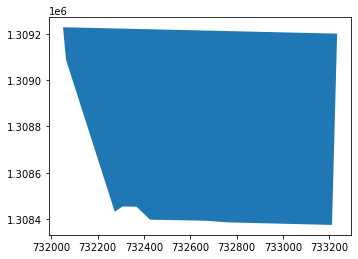

In [57]:
set_gdf[set_gdf.wdID=='WD2018-0168'].plot()

In [62]:
def add_issueIDs_to_set(setID, export=True):
    mapped = [lyr for lyr in fiona.listlayers(issuepath) if (lyr != 'WD2017_0229') and ('L' not in lyr)]
    ID_lst = list(map(lambda x:x.replace("_", "-"), mapped))
    issueIDs_by_set = pd.read_csv(outpath + f'\\to_review\\{setID}_Mapping_Issues.csv')
    mappedIDs = [wdID for wdID in issueIDs_by_set.wetdet_delin_number.values if wdID in ID_lst]
    tocheckIDs = [wdID for wdID in issueIDs_by_set.wetdet_delin_number.values if wdID not in ID_lst]
    set_gdf = gpd.read_file(outpath + f'\\final\\mapped_wd_{setID}.shp')
    gdf = merge_single_partial_file(setID=False, 
                                wIDlist=list(map(lambda x:x.replace("-", "_"), mappedIDs)), 
                                from_set=False)
    gdf = gdf.dissolve('wdID')
    gdf['wdID'] = gdf.index
    gdf.reset_index(drop=True, inplace=True)
    gdf.loc[gdf.wdID.isin(code0),'code'] = 0
    gdf.loc[gdf.wdID.isin(code1),'code'] = 1
    gdf.loc[gdf.code.isnull(),'code'] = 2
    set_gdf = pd.concat([set_gdf[~set_gdf.wdID.isin(mappedIDs)], gdf[['code', 'wdID', 'geometry']]])
    if export:
        set_gdf.to_file(os.path.join(inpath, "output", "final", f"{setID}_mapped_wd.shp"), index=False)
    return tocheckIDs, set_gdf